In [1]:
# Step 1. Import all Packages: Pandas, Numpy, and Statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

#import scipy
import scipy.optimize as spo
from scipy.optimize import minimize
from scipy.optimize import fsolve

In [2]:
# Step 2. MI Parameter Values - from Non-Linear Regression

# MI Parameters
a1 = 882.900282
a2 = 0.353976
a3 = 0.755553
a4 = 0.824951
b1 = 0.963963

In [3]:
# Step 3. MI Function
def MI_calc(a1, a2, a3, a4, b1, Size, Volatility, POV):
    mi = (a1*Size**a2*Volatility**a3) * (b1*POV**a4 + (1-b1))
    return mi
 

In [4]:
# Step 4. TR Function
def TR_calc(Size, Volatility, POV):
    tr = Volatility * ((1/3*1/250*Size*(1-POV)/POV )**0.5) * 10**4
    return tr


In [5]:
# Step 5. PA Function
def PA_calc(SideIndicator, AlphaBp, Size, POV):
    pa = SideIndicator * (1/2) * AlphaBp * Size * ((1 - POV)/POV)
    return pa


In [6]:
# Step 6. Trade Time Function
def TradeTime_calc(Size, POV):
    tt = Size * ((1-POV)/POV)
    return tt


In [7]:
# Step 7. Example
#
# Calculate Trade Costs:
# Market Impact (MI)
# Timing Risk (TR)
# Price Appreciation (PA)
# Trade Time (TradeTime)

# Order Characteristics
Symbol="RLK"
Side="BUY"
SideIndicator=1

Size = 0.10
Volatility = 0.35
AlphaBp=100

POV = 0.20

Lambda=0.5

# Cost Calculation Functions
MI = MI_calc(a1, a2, a3, a4, b1, Size, Volatility, POV)
TR = TR_calc(Size, Volatility, POV)
PA = PA_calc(SideIndicator, AlphaBp, Size, POV)
TradeTime = TradeTime_calc(Size, POV)

# Print to Screen
print(MI, TR, PA, TradeTime)


51.546054406702325 80.82903768654761 20.0 0.4


Text(0, 0.5, 'cdf')

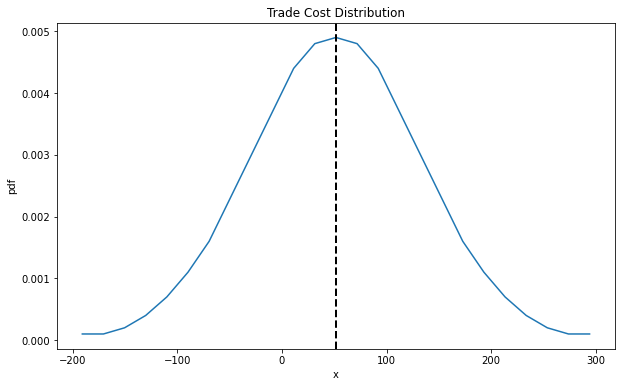

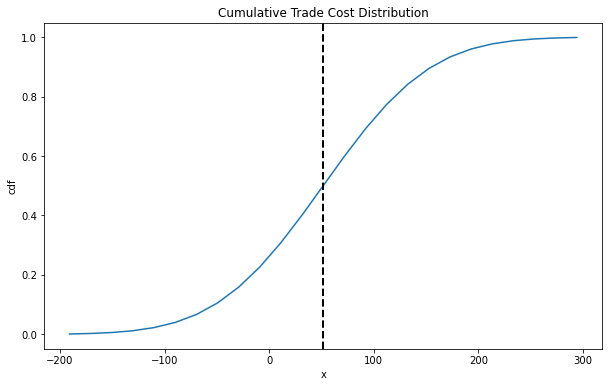

In [8]:
# Step 8. Calculate PDF and CDF Graphs - Upper and Lower Bounds

# Use the results from above in Step 6.
#TC_Mean = 51.54
#TC_Stdev = 80.82
TC_Mean = MI
TC_Stdev = TR


# Define Bounds for Graphs, use -3 to 3
LB = -3
UB = 3
z_values =[]


# Compute Graphs
while LB<=UB:
    z_values.append(LB)
    LB = LB + 0.25

cost_functions = pd.DataFrame(z_values, columns = ['z'])
cost_functions['x'] = TC_Mean + cost_functions['z'] * TC_Stdev
cost_functions['pdf'] = cost_functions.apply(lambda x: round(scipy.stats.norm(loc = TC_Mean, scale = TC_Stdev).pdf(x['x']),4), axis=1)
cost_functions['cdf'] = cost_functions.apply(lambda x: round(scipy.stats.norm(loc = TC_Mean, scale = TC_Stdev).cdf(x['x']),4), axis=1)
cost_functions

# PDF Graph
plt.figure(figsize=(10,6))
plt.plot(cost_functions['x'], cost_functions['pdf'])
plt.axvline(cost_functions['x'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('Trade Cost Distribution')
plt.xlabel("x")
plt.ylabel("pdf")

# CDF Graph
plt.figure(figsize=(10,6))
plt.plot(cost_functions['x'], cost_functions['cdf'])
plt.axvline(cost_functions['x'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('Cumulative Trade Cost Distribution')
plt.xlabel("x")
plt.ylabel("cdf")



In [9]:
# Step 9. PDF and CDF Graph Data - Cost Functions

cost_functions = pd.DataFrame(z_values, columns = ['z'])
cost_functions['x'] = TC_Mean + cost_functions['z'] * TC_Stdev
cost_functions['pdf'] = cost_functions.apply(lambda x: round(scipy.stats.norm(loc = TC_Mean, scale = TC_Stdev).pdf(x['x']),4), axis=1)
cost_functions['cdf'] = cost_functions.apply(lambda x: round(scipy.stats.norm(loc = TC_Mean, scale = TC_Stdev).cdf(x['x']),4), axis=1)
cost_functions

,z,x,pdf,cdf
0,-3.00,-190.941059,0.0001,0.0013
1,-2.75,-170.733799,0.0001,0.0030
2,-2.50,-150.526540,0.0002,0.0062
3,-2.25,-130.319280,0.0004,0.0122
4,-2.00,-110.112021,0.0007,0.0228
5,-1.75,-89.904762,0.0011,0.0401
6,-1.50,-69.697502,0.0016,0.0668
7,-1.25,-49.490243,0.0023,0.1056
8,-1.00,-29.282983,0.0030,0.1587
9,-0.75,-9.075724,0.0037,0.2266


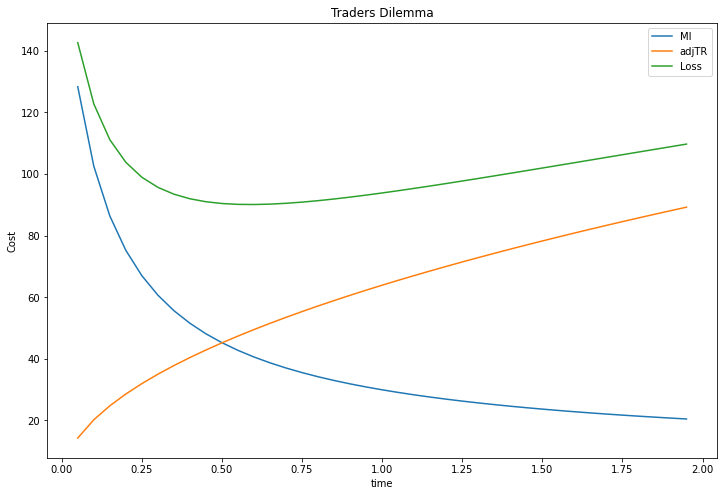

,time,POV,MI,TR,adjTR,Loss
0,0.05,0.666667,128.339699,28.577380,14.288690,142.628389
1,0.10,0.500000,102.572091,40.414519,20.207259,122.779350
2,0.15,0.400000,86.397520,49.497475,24.748737,111.146257
3,0.20,0.333333,75.222472,57.154761,28.577380,103.799852
4,0.25,0.285714,67.000691,63.900965,31.950483,98.951174
5,0.30,0.250000,60.676622,70.000000,35.000000,95.676622
6,0.35,0.222222,55.648245,75.608641,37.804321,93.452566
7,0.40,0.200000,51.546054,80.829038,40.414519,91.960573
8,0.45,0.181818,48.130155,85.732141,42.866070,90.996225
9,0.50,0.166667,45.237725,90.369611,45.184806,90.422530


In [10]:
# Step 10. Traders Dilemma Graph


# Step 10.1 Traders Dilemma Graph - x-axis = trade time
LB = 0.05
UB = 2
time_values =[]

while LB<=UB:
    time_values.append(LB)
    LB = LB + 0.05
#time_values


# Step 10.2 Traders Dilemma Graph - Cost Calculations
SS_df = pd.DataFrame(time_values, columns = ['time'])   
SS_df['POV'] = Size/(Size + SS_df['time'])
#SS_df['MI'] = SS_df.apply(lambda x: MI_calc(a1, a2, a3, a4, b1, x['POV'], lambda_, Size, Volatility),axis=1)
SS_df['MI'] = SS_df.apply(lambda x: MI_calc( a1, a2, a3, a4, b1, Size, Volatility,x['POV']),axis=1)
SS_df['TR'] = SS_df.apply(lambda x: TR_calc(Size, Volatility,x['POV']),axis=1)
SS_df['adjTR'] = SS_df['TR'] * Lambda
SS_df['Loss'] = SS_df['MI'] + Lambda * SS_df['TR']
#SS_df


# Step 10.3 Traders Dilemma Graph
plt.figure(figsize=(12,8))
plt.plot(SS_df['time'], SS_df['MI'], label ='MI')
plt.plot(SS_df['time'], SS_df['adjTR'], label ='adjTR')
plt.plot(SS_df['time'], SS_df['Loss'], label ='Loss')
plt.xlabel("time")
plt.ylabel("Cost")
plt.legend()
plt.title('Traders Dilemma')
plt.show()

SS_df

In [12]:
# Step 11. Calculate Single Stock Optimal POV Rate


# User Specific Lambda
Lambda=0.5


# Step 11.1 Define POV Optimization Function
def Opt_POV_calc(POV, Size, Volatility, Lambda, a1, a2, a3, a4, b1):
    MI = (a1*Size**a2*Volatility**a3) * (b1*POV**a4 + (1-b1))
    TR = Volatility * ((1/3*1/250*Size*(1-POV)/POV )**0.5) * 10**4
    f = MI + (Lambda * TR)
    return f


# Step 11.2 Set Upper and Upper Bounds
bound1 = [(0.00001,1)]
bounds = (bound1)

# Step 11.3 - Initial Guess
x0=0.20; 
print(x0)


# Step 11.3 Run Single Stock POV Optimization
#POV = minimize(Opt_POV_calc, 0.5, bounds = bounds, args = (Size, Volatility, Lambda, a1, a2, a3, a4, b1))
#Opt_POV = minimize(Opt_POV_calc, 0.5, bounds = bounds, args = (Size, Volatility, Lambda, a1, a2, a3, a4, b1))
Opt_POV = minimize(Opt_POV_calc, x0, bounds = bounds, args = (Size, Volatility, Lambda, a1, a2, a3, a4, b1))


# Step 11.4 - Get TCA Results

# Optimal POV Rate
POV=Opt_POV.x

# Cost Calculation Functions
MI = MI_calc(a1, a2, a3, a4, b1, Size, Volatility, POV)
TR = TR_calc(Size, Volatility, POV)
TradeTime = TradeTime_calc(Size, POV)

# Print Results to Screen
print(POV, TradeTime, MI, TR)


0.2
[0.14545771] [0.58748505] [41.1096833] [97.95707808]
